In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() 
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name = "E Comm")
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

# DATA PREPROCESSING

In [ ]:
# dropping Customer ID Column
df.drop("CustomerID", axis=1, inplace=True)

In [ ]:
# Impue NULL valued examples from the dataset
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

1. PreferredLogInDevice - obj
2. PreferredPaymentMode - obj
3. Gender - obj
4. PreferedOrderCat - obj
5. MaritalStatus - obj

We need to encode these into numerical data

In [ ]:
# separate out the Numerical and Categorical Columns to perform imputation on
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

numerical_cols = ['Churn', 'Tenure',  'CityTier',
       'WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore',
        'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
df[numerical_cols] = mean_imputer.fit_transform(df[numerical_cols])

In [ ]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
# We will encode the catagorical variables using One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[categorical_cols])

['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Now we form the feature matrix and the target variable column vector from df

X = df[numerical_cols+encoded_cols]
X.drop("Churn", axis=1, inplace=True)

y = df["Churn"]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
y.value_counts()

0.0    4682
1.0     948
Name: Churn, dtype: int64

# HANDLING CLASS IMBALANCES

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

1.0    4682
0.0    4682
Name: Churn, dtype: int64

# CREATE THE TRAIN AND TEST SETS

In [ ]:
# Perform the Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=99)

In [ ]:
X_train.shape

(7491, 34)

In [ ]:
y_train.value_counts()

1.0    3760
0.0    3731
Name: Churn, dtype: int64

# DEEP FEED-FORWARD NEURAL NETWORK

In [ ]:
model = keras.Sequential(
    [
        Dense(16, input_dim=34, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                560       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

In [ ]:
# finally fit the model on the data

hist = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=15
)

Train on 7491 samples
Epoch 1/100
7491/7491 [==============================] - 1s 79us/sample - loss: 0.7449 - binary_accuracy: 0.6895
Epoch 2/100
7491/7491 [==============================] - 1s 81us/sample - loss: 0.4662 - binary_accuracy: 0.7839
Epoch 3/100
7491/7491 [==============================] - 1s 76us/sample - loss: 0.4355 - binary_accuracy: 0.8022
Epoch 4/100
7491/7491 [==============================] - 1s 76us/sample - loss: 0.4239 - binary_accuracy: 0.8056
Epoch 5/100
7491/7491 [==============================] - 1s 74us/sample - loss: 0.4239 - binary_accuracy: 0.8092
Epoch 6/100
7491/7491 [==============================] - 1s 79us/sample - loss: 0.4155 - binary_accuracy: 0.8146
Epoch 7/100
7491/7491 [==============================] - 1s 74us/sample - loss: 0.4081 - binary_accuracy: 0.8159
Epoch 8/100
7491/7491 [==============================] - 1s 75us/sample - loss: 0.4070 - binary_accuracy: 0.8167
Epoch 9/100
7491/7491 [==============================] - 1s 75us/sample - 

# SVM CLASSIFIER

In [ ]:
from sklearn import svm
clf = svm.SVC(C=100, kernel="poly", verbose=True, degree=2)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=100, degree=2, kernel='poly', verbose=True)

In [ ]:
clf.predict(X_test)

array([1., 0., 1., ..., 1., 1., 0.])

#EVALUATIONS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

In [ ]:
y_train_pred = [round(y_pred[0]) for y_pred in model.predict(X_train)]
y_test_pred = [round(y_pred[0]) for y_pred in model.predict(X_test)]

print("ACCURACY ON TRAIN SET: ", accuracy_score(y_train, y_train_pred))
print("ACCURACY ON TEST SET: ", accuracy_score(y_test, y_test_pred))

ACCURACY ON TRAIN SET:  0.9227072486984381
ACCURACY ON TEST SET:  0.9236518953550453


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


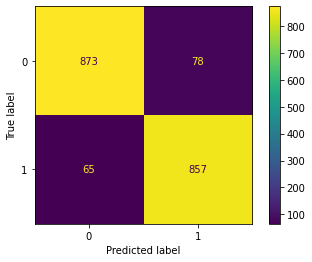

In [ ]:
conf_mat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       951
         1.0       0.92      0.93      0.92       922

    accuracy                           0.92      1873
   macro avg       0.92      0.92      0.92      1873
weighted avg       0.92      0.92      0.92      1873



In [ ]:
y_train_pred = [int(y_pred>0.5) for y_pred in clf.predict(X_train)]
y_test_pred = [int(y_pred>0.5) for y_pred in clf.predict(X_test)]

print("ACCURACY ON TRAIN SET: ", accuracy_score(y_train, y_train_pred))
print("ACCURACY ON TEST SET: ", accuracy_score(y_test, y_test_pred))

ACCURACY ON TRAIN SET:  0.8240555333066346
ACCURACY ON TEST SET:  0.8291510945008008


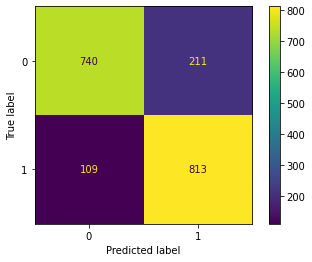

In [ ]:
conf_mat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       951
         1.0       0.79      0.88      0.84       922

    accuracy                           0.83      1873
   macro avg       0.83      0.83      0.83      1873
weighted avg       0.83      0.83      0.83      1873



# SHAP EXPLANATIONS

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, 
# so we define a wrapper function around the original Keras predict function

def prediction_wrapper(X):
  return model.predict([X[:,i] for i in range(X.shape[0])]).flatten()

In [ ]:
# select a set of background examples to take an expectation over
background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(
    (model.layers[0].input, model.layers[-1].output), background
)
shap_values = explainer.shap_values(X_test[:].values) 

# print the JS visualization code to the notebook

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.



In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0], feature_names=X_train.columns
)

In [ ]:
# Negative Sample
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0][1], feature_names=X_train.columns
)

In [ ]:
# Positive Sample
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0][10], feature_names=X_train.columns
)

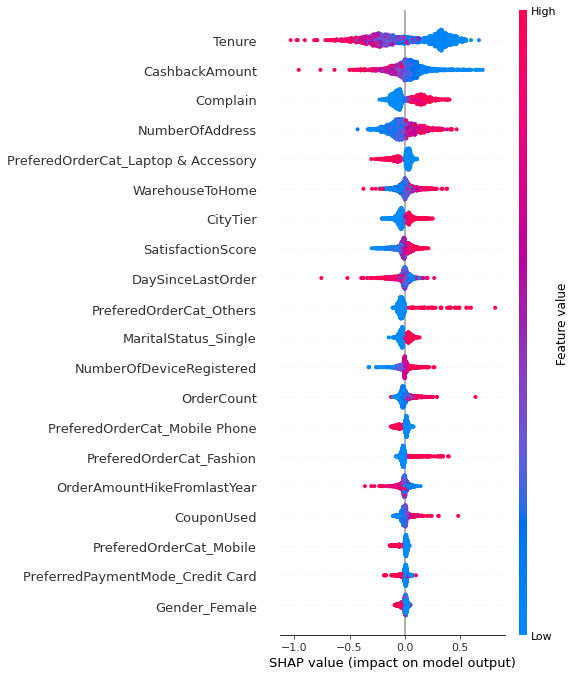

In [ ]:
shap.summary_plot(shap_values[0],X_test)
# shap_values

# PDP EXPLANATIONS

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 149 kB/s 
     |████████████████████████████████| 13.1 MB 23.9 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=90ed09639bcfa00bacb99ecd87b03ef69cdf4917c071f88bbd230ca920a6f088
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=0d3dc3739a703ff804d2b520266c7e5a0a87045e8b691716bd5c8daccad46c5a
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9364 entries, 0 to 9363
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 9364 non-null   float64
 1   CityTier                               9364 non-null   float64
 2   WarehouseToHome                        9364 non-null   float64
 3   HourSpendOnApp                         9364 non-null   float64
 4   NumberOfDeviceRegistered               9364 non-null   float64
 5   SatisfactionScore                      9364 non-null   float64
 6   NumberOfAddress                        9364 non-null   float64
 7   Complain                               9364 non-null   float64
 8   OrderAmountHikeFromlastYear            9364 non-null   float64
 9   CouponUsed                             9364 non-null   float64
 10  OrderCount                             9364 non-null   float64
 11  DayS

In [ ]:
from pdpbox import pdp, info_plots

features = ["Tenure",	"CityTier",	"WarehouseToHome",	"HourSpendOnApp",	"NumberOfDeviceRegistered",	"SatisfactionScore",	"NumberOfAddress", "Complain",	"OrderAmountHikeFromlastYear",	"CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount", "PreferredLoginDevice_Computer", "PreferredLoginDevice_Mobile Phone", "PreferredLoginDevice_Phone", "PreferredPaymentMode_CC", "PreferredPaymentMode_COD", "PreferredPaymentMode_Cash on Delivery", "PreferredPaymentMode_Credit Card", "PreferredPaymentMode_Debit Card", "PreferredPaymentMode_E wallet", "PreferredPaymentMode_UPI", "Gender_Female", "Gender_Male",	"PreferedOrderCat_Fashion",	"PreferedOrderCat_Grocery",	"PreferedOrderCat_Laptop & Accessory",	"PreferedOrderCat_Mobile",	"PreferedOrderCat_Mobile Phone",	"PreferedOrderCat_Others",	"MaritalStatus_Divorced",	"MaritalStatus_Married",	"MaritalStatus_Single"]

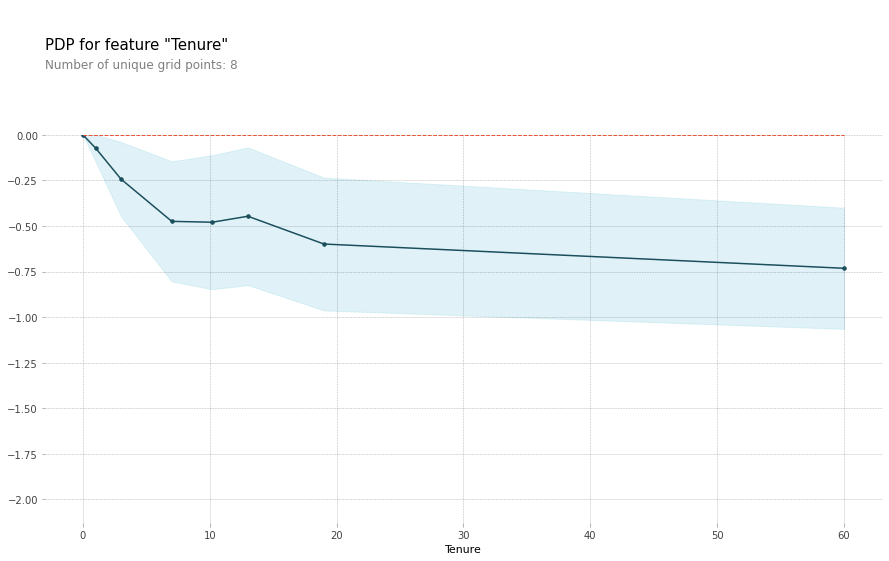

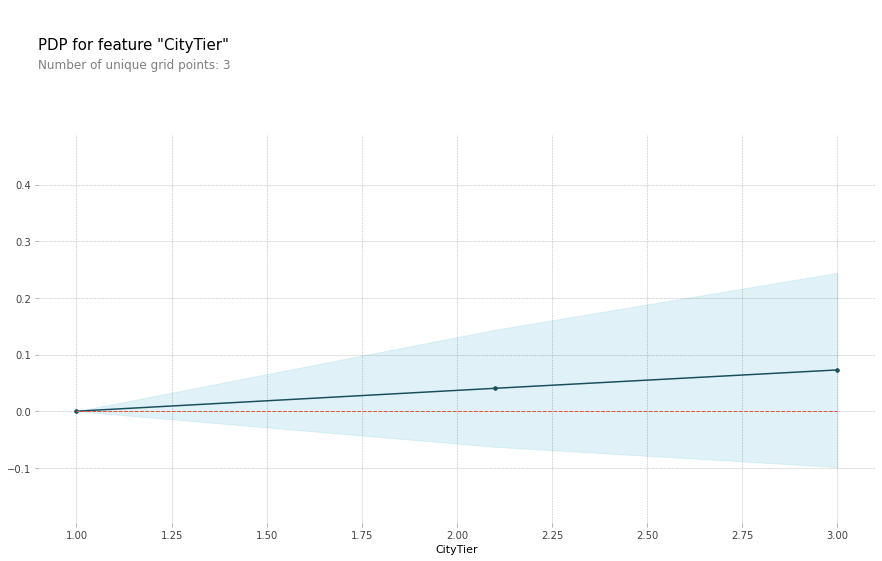

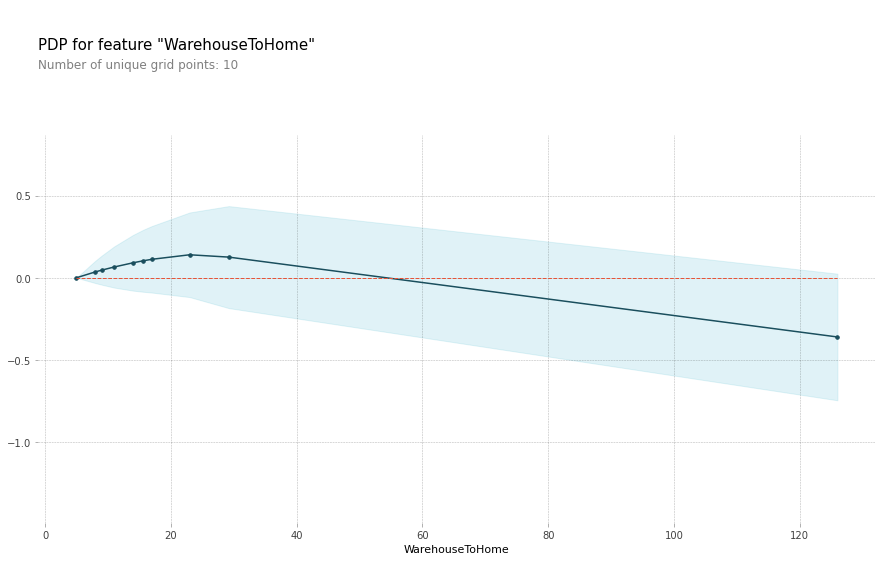

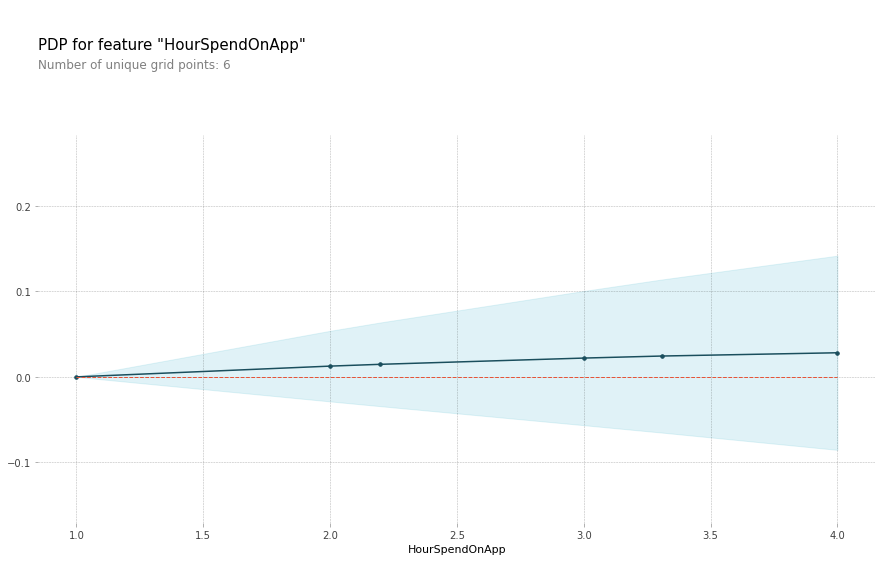

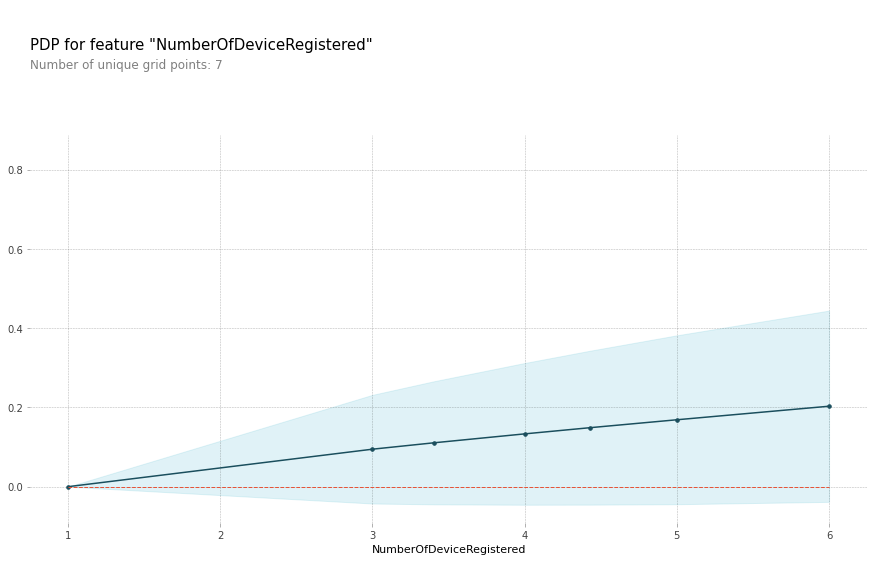

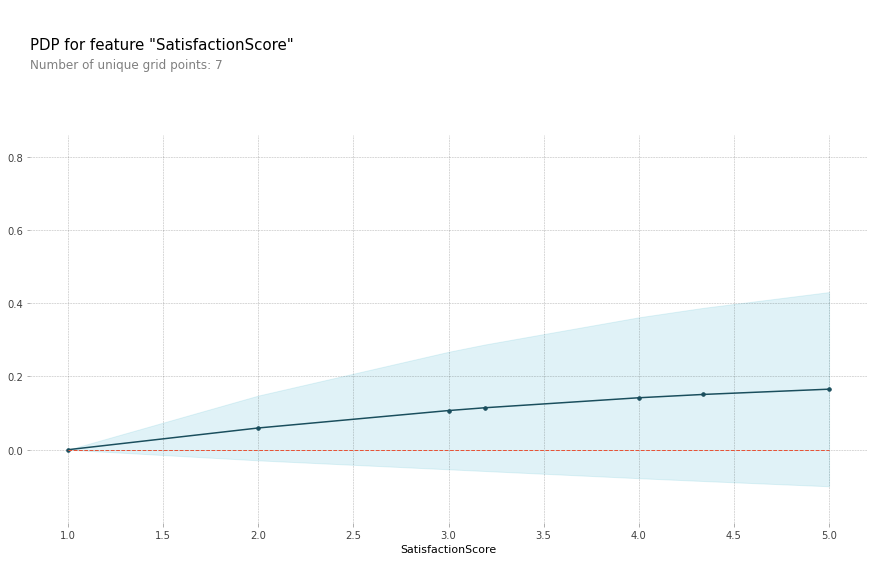

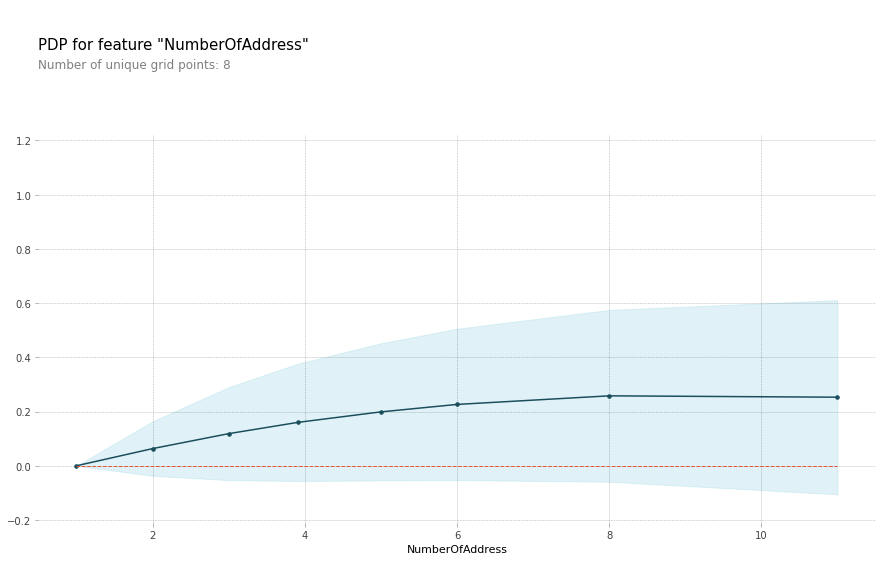

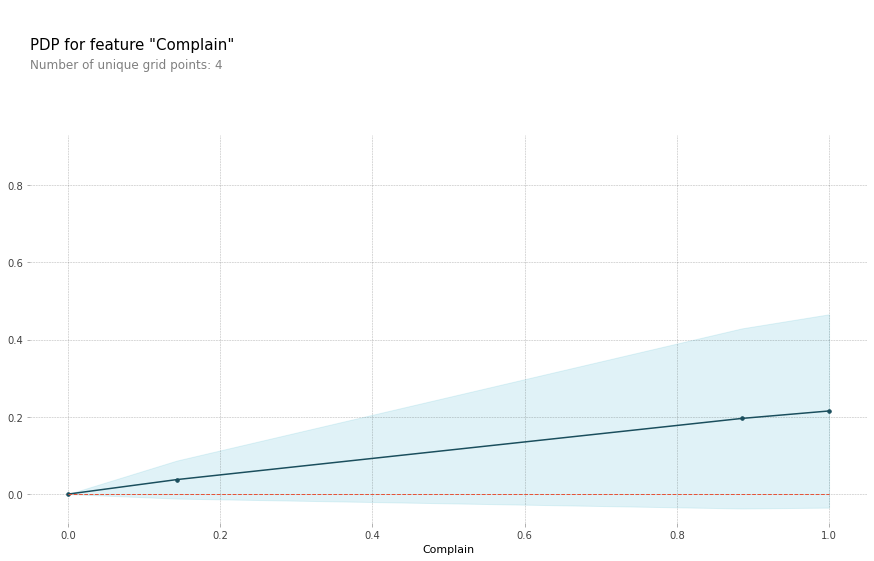

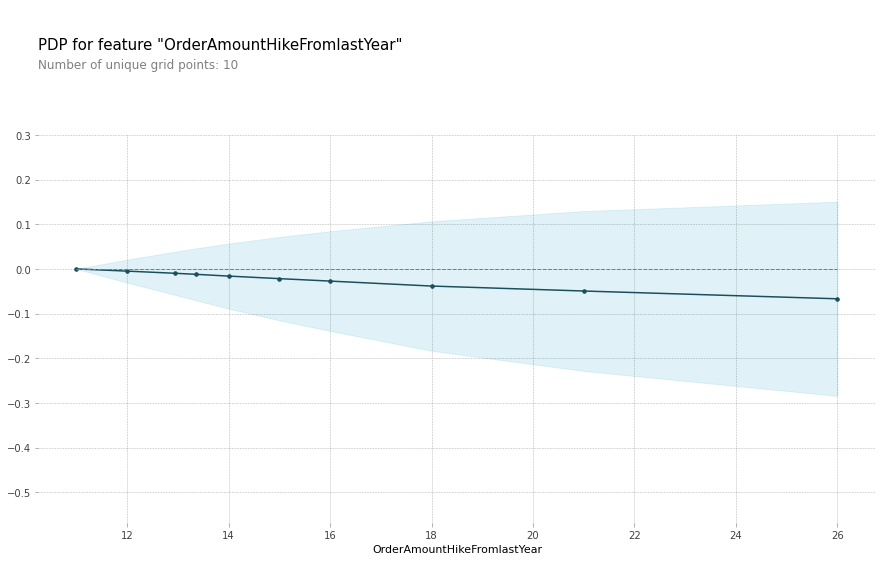

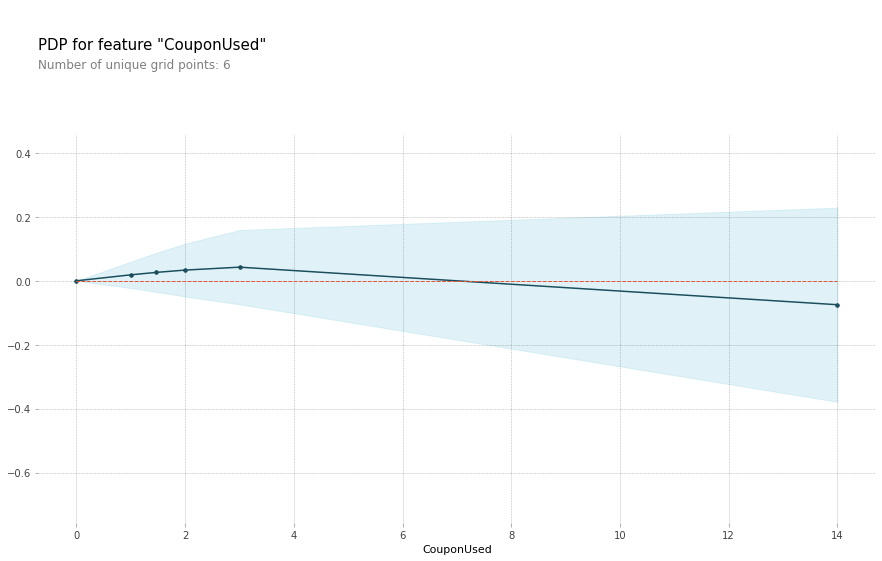

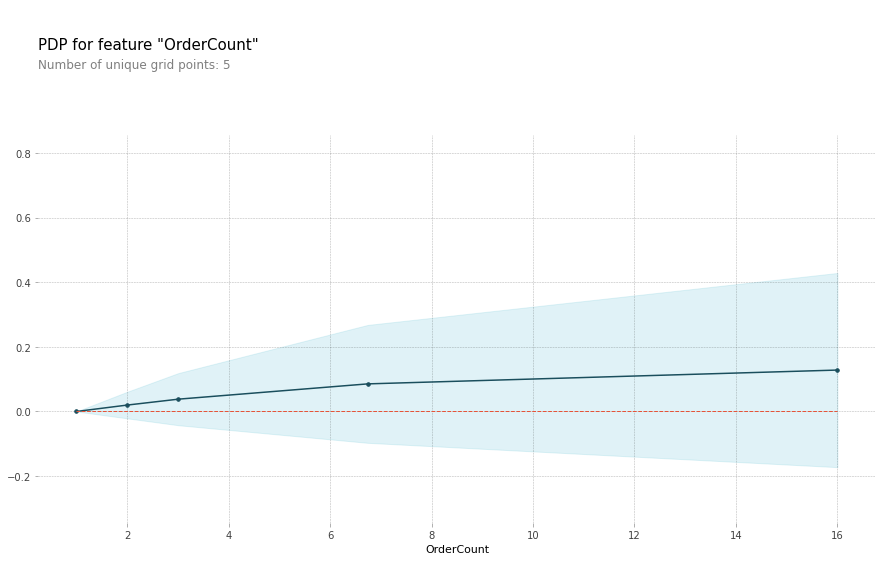

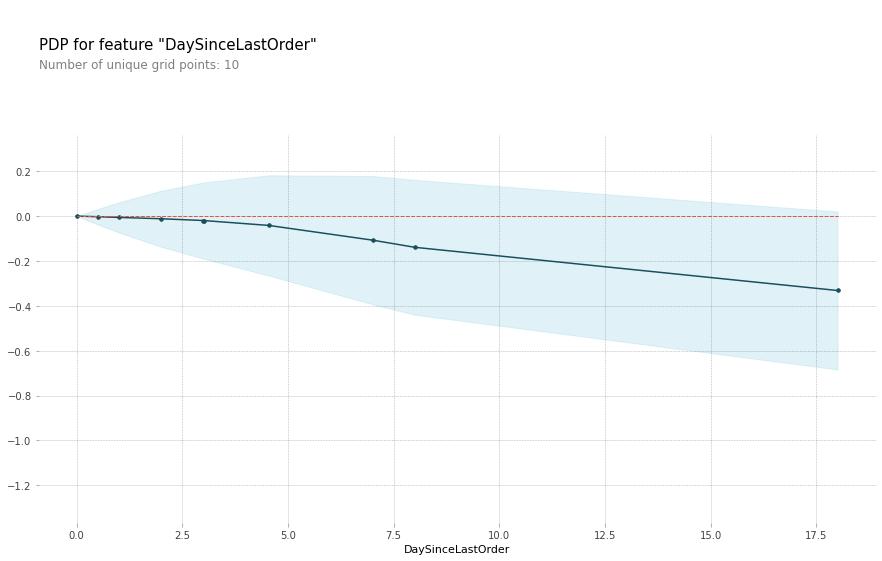

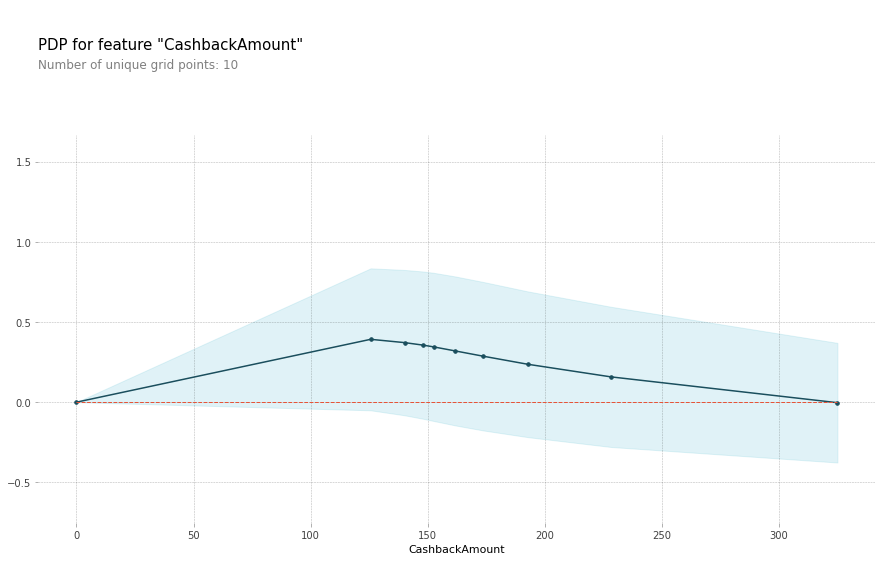

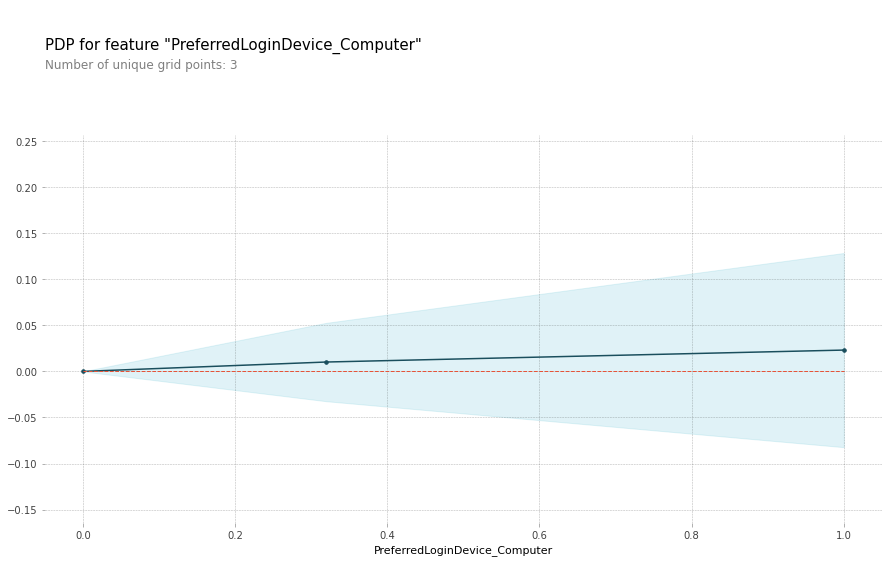

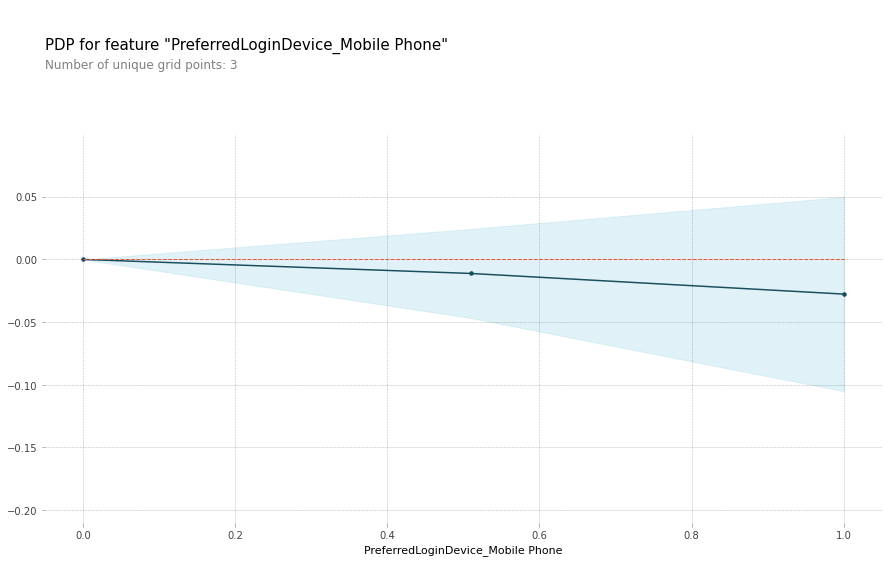

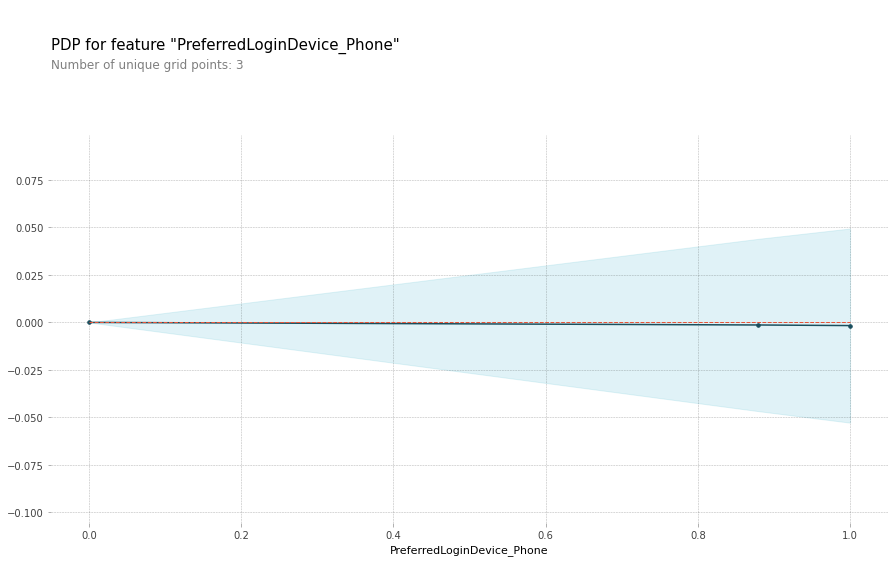

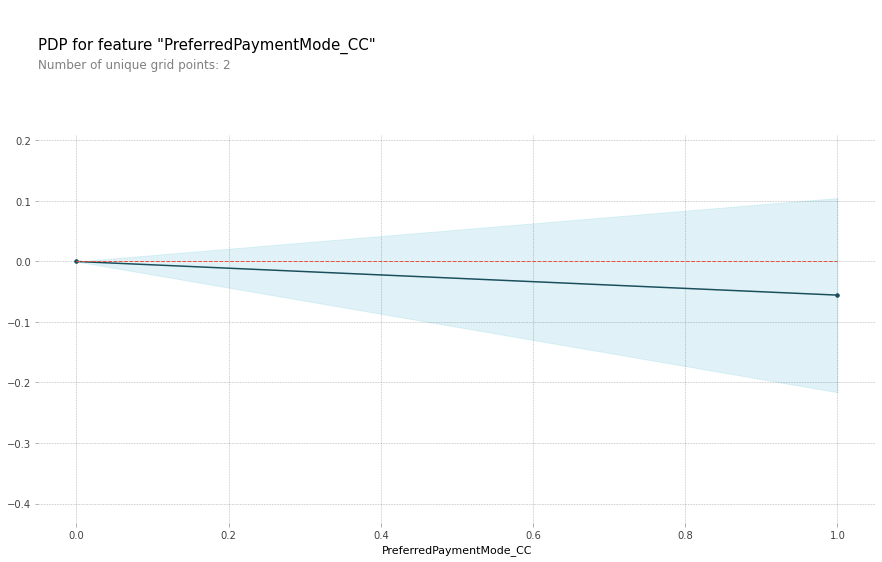

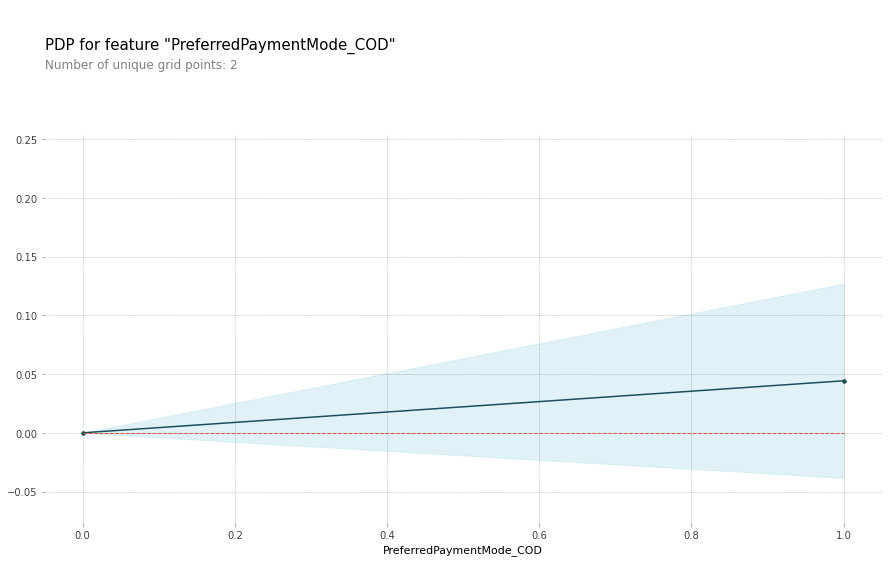

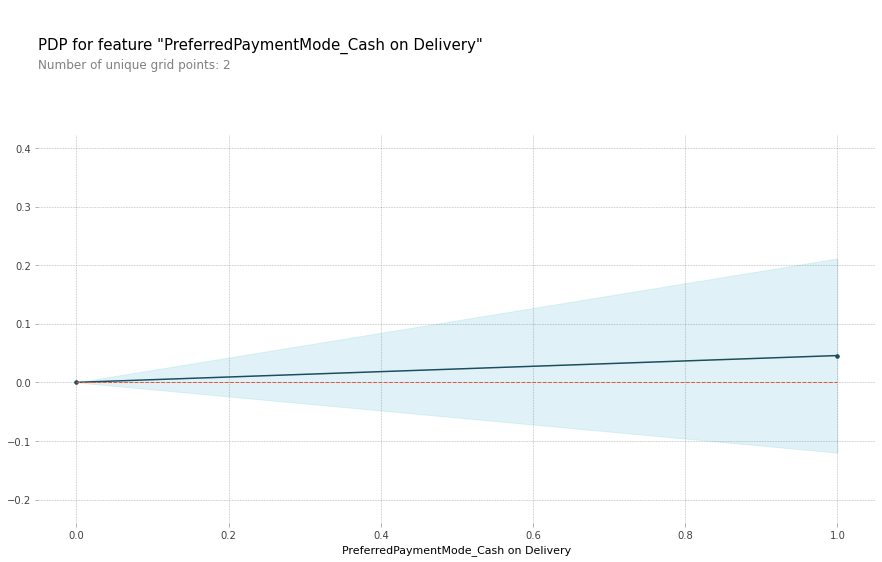

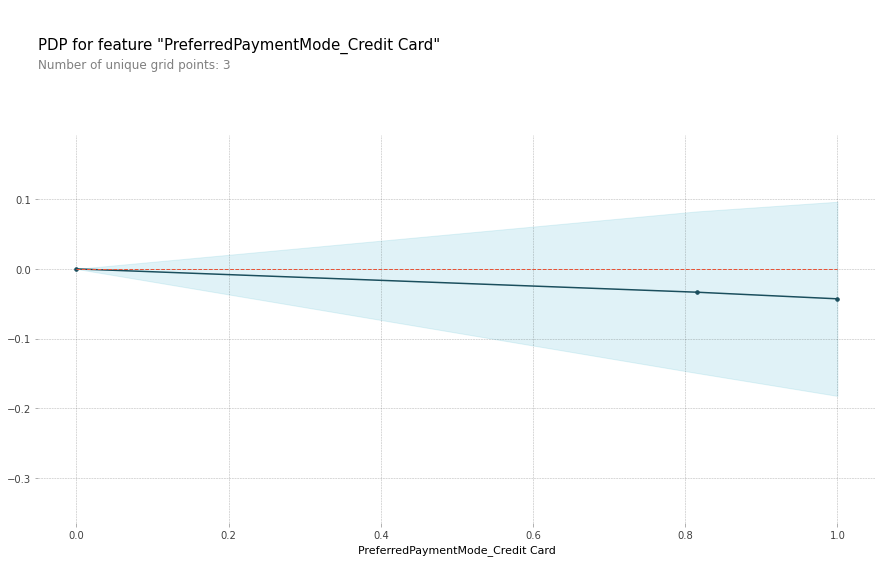

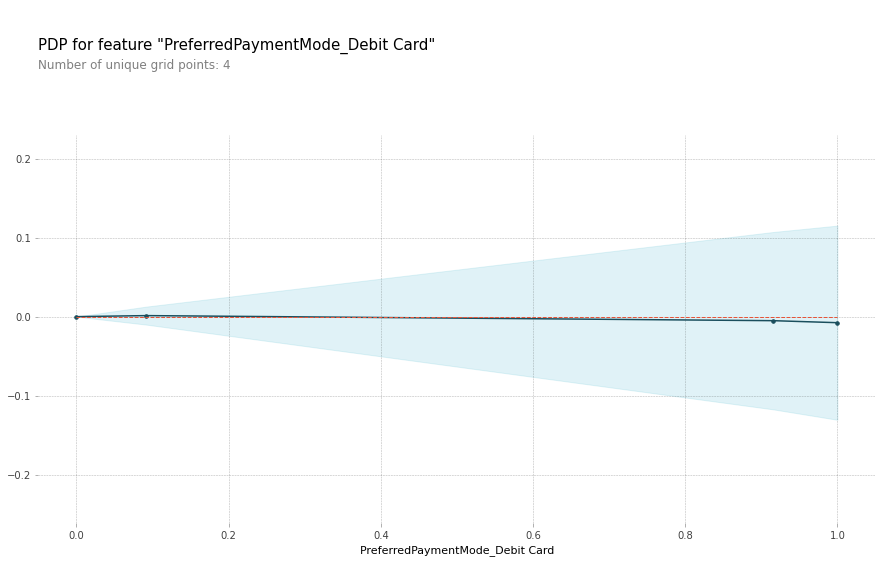

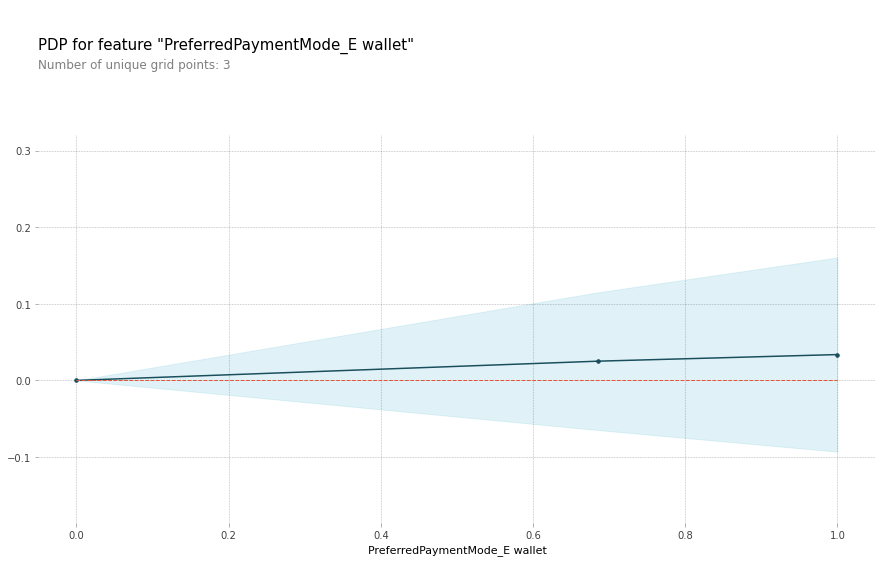

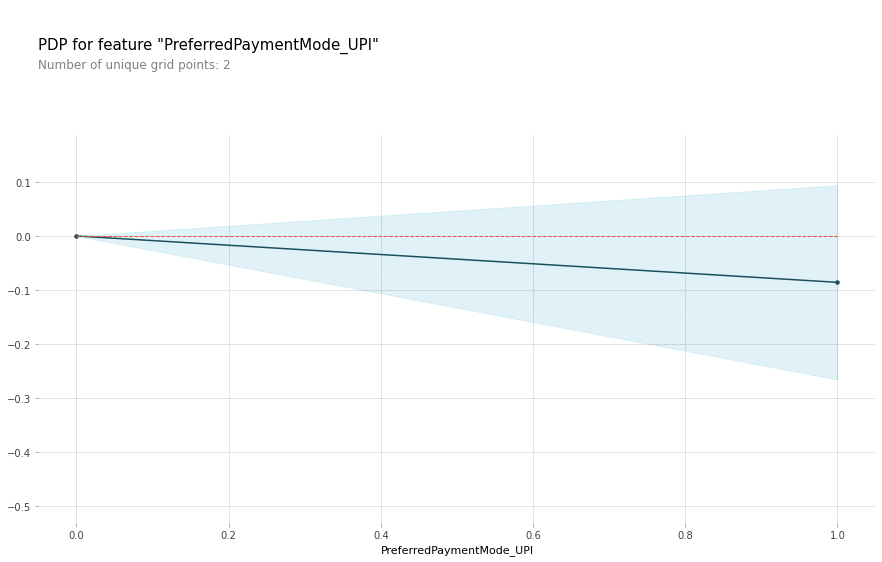

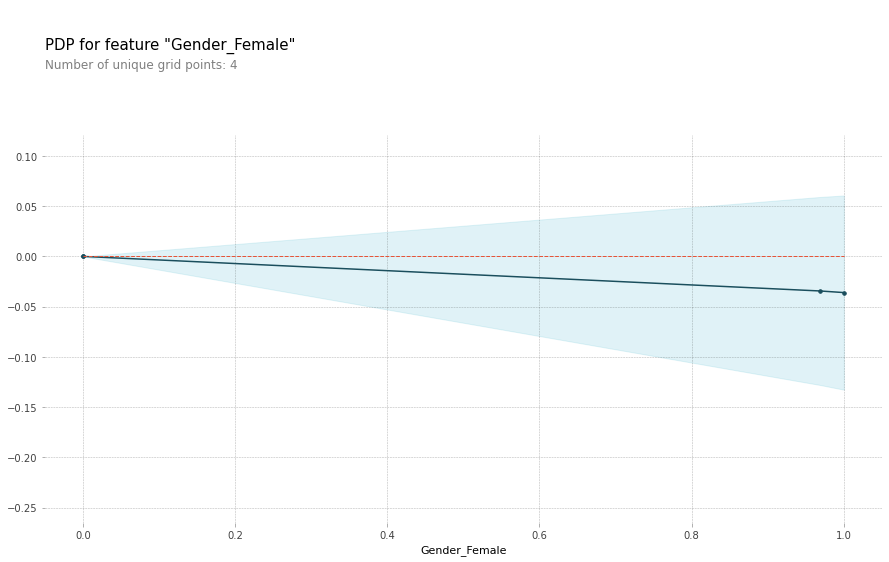

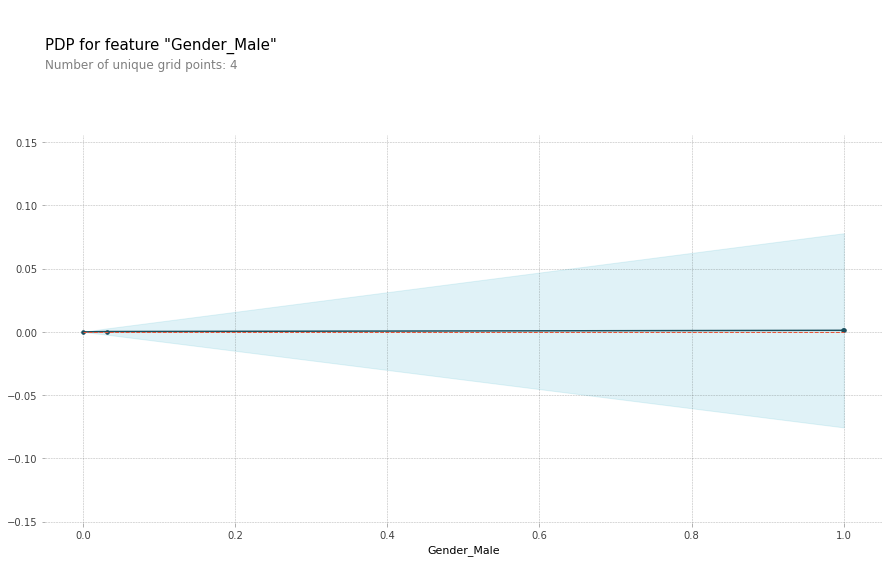

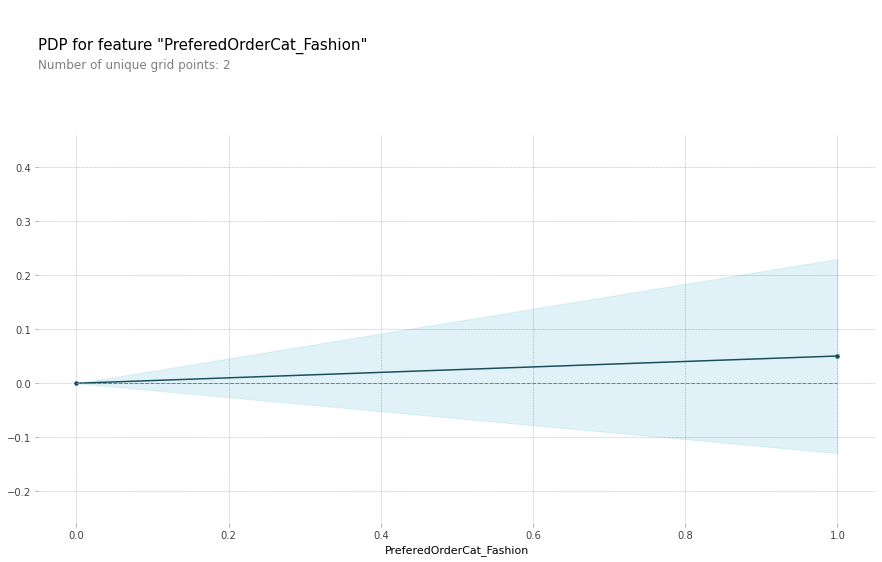

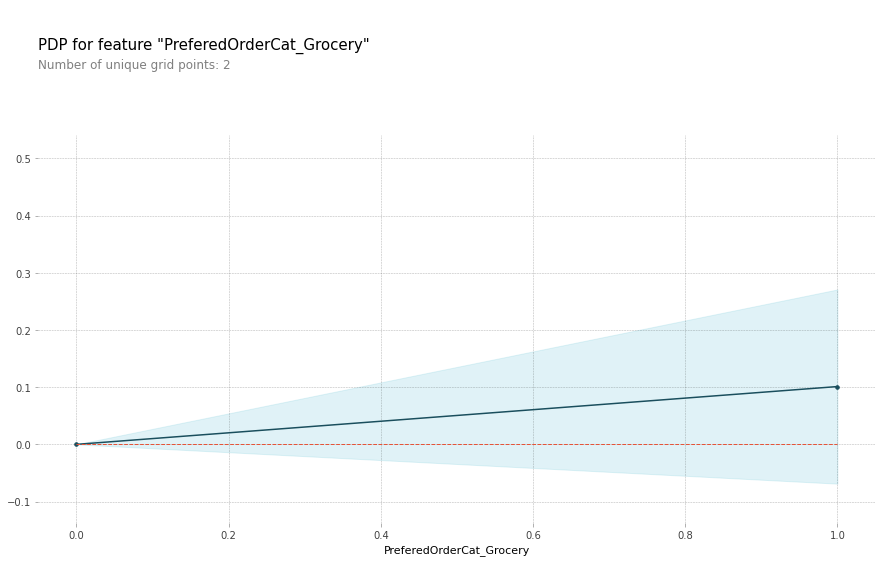

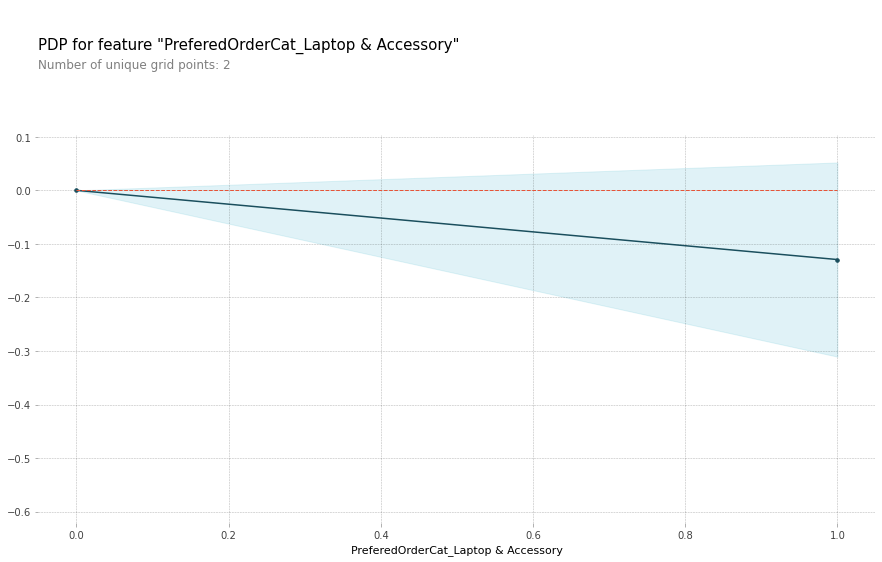

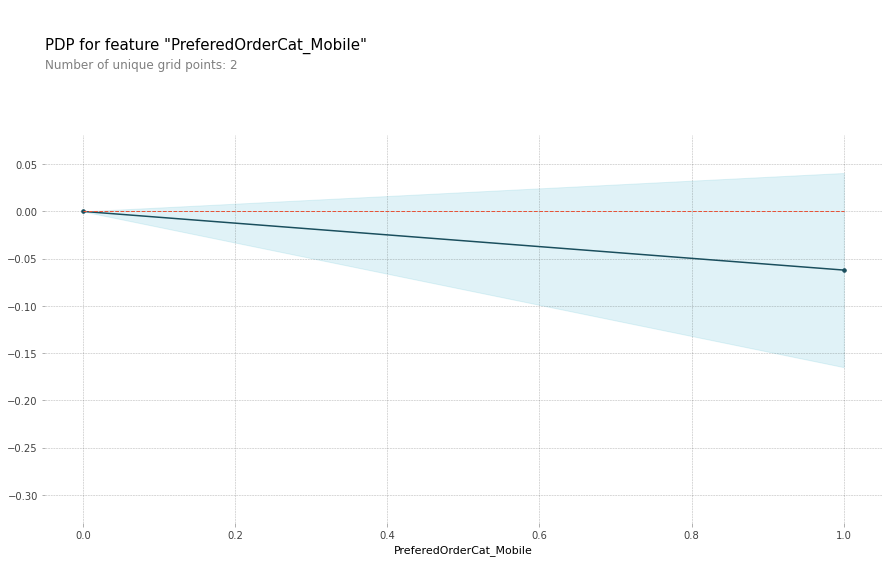

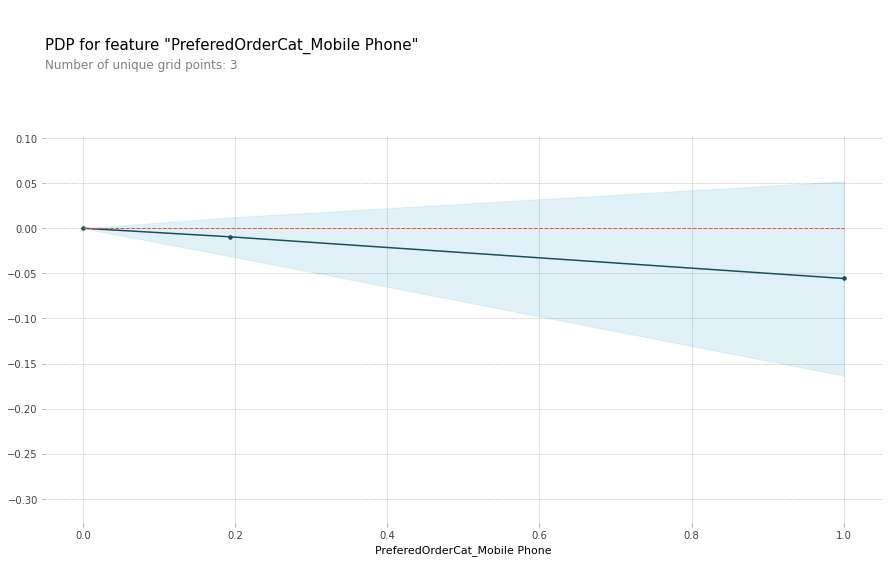

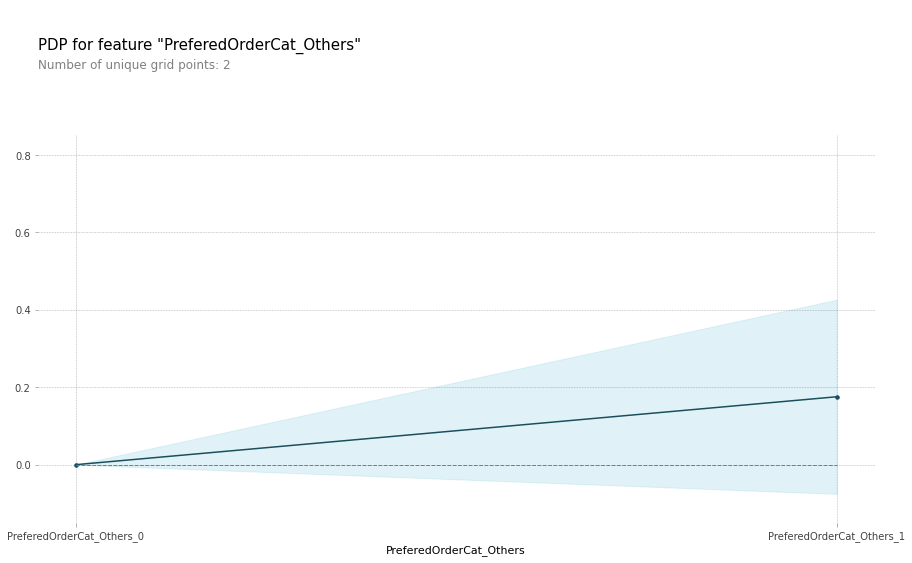

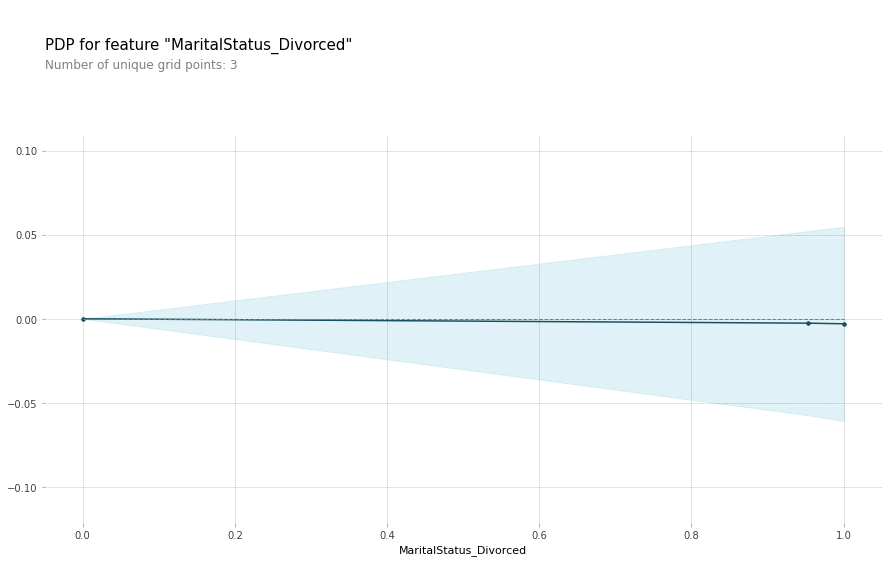

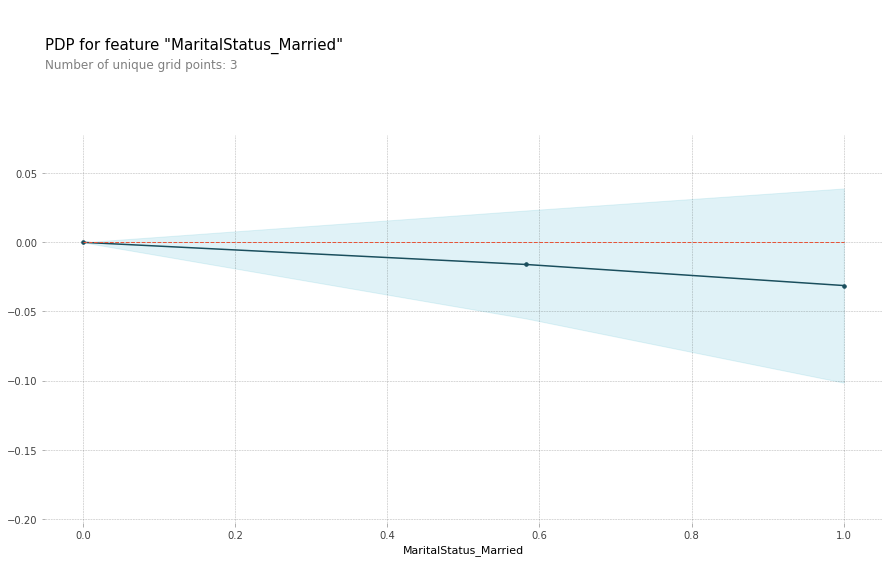

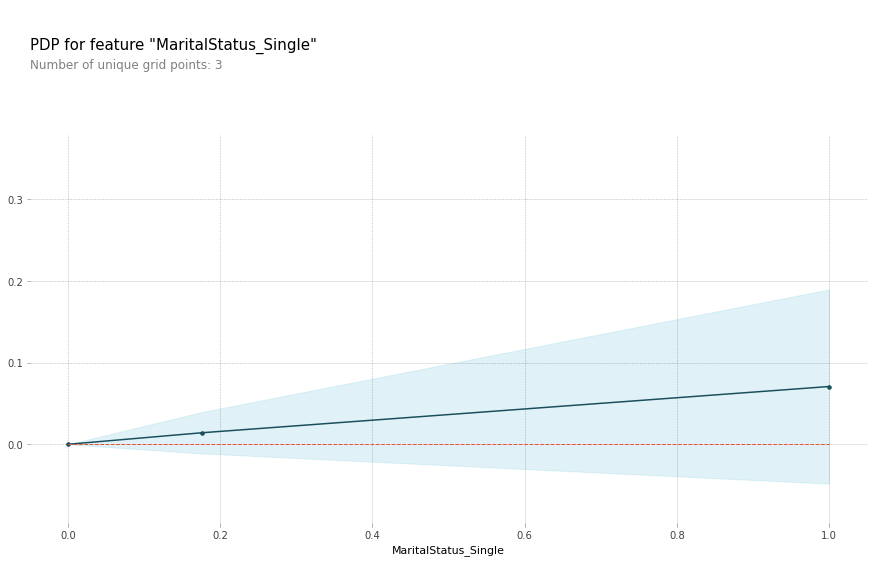

In [ ]:
for feature_name in features:
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_train.columns.tolist(), feature=feature_name);

    # plot it
    pdp.pdp_plot(pdp_goals, feature_name);
    plt.show();

# CAUSAL ANALYSIS

In [55]:
!pip install dowhy
!pip install cdt
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.2 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 921 kB 5.3 MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=21493eea78e511825e880ccc7625578de9c6174ca6e317b028a6bb6f51e1e83a
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29269 sha256=2d9d96d6bb97c53131cc9bd23584b250ad1aa851e6791a0cf4da721a03fa71a9
  Stored in directory: /root/.cache/pip/wheels/4f/3b/07/22a9a01f3f25cd376122b5ef526737a44993b4c312e50916ed
Successfully built GPUti

In [56]:
!sudo add-apt-repository ppa:dns/gnu
!sudo apt-get update
!sudo apt install libgsl-dev

 .: In this PPA you can find new releases & backports of a few GNU packages :.

PACKAGE NAME . | SHORT DESCRIPTION . . . . . | HOMEPAGE / MORE INFO
===============|=============================|===============================
autoconf-archive . . .Autoconf Macro Archive | https://kutt.it/cbtcyr
---------------|-----------------------------|-------------------------------
autogen. . . . | Automated Text/Program Gen. | https://gnu.org/s/autogen
---------------|-----------------------------|-------------------------------
automake . . . | Auto generating Makefile.in | https://gnu.org/s/automake
---------------|-----------------------------|-------------------------------
binutils . . . | GNU binary utilities. . . . | https://gnu.org/s/binutils
---------------|-----------------------------|-------------------------------
bison. . . . . | Compatible Parser Generator | https://gnu.org/s/bison
---------------|-----------------------------|-------------------------------
cflow. . . . . | Contr

In [57]:
!Rscript setup.r

Streaming output truncated to the last 5000 lines.
/usr/local/lib/R/site-library/RcppEigen/include/Eigen/src/Core/Block.h:154:7:   [ skipping 13 instantiation contexts, use -ftemplate-backtrace-limit=0 to disable ]
/usr/local/lib/R/site-library/RcppEigen/include/Eigen/src/Core/NoAlias.h:58:31:   required from ‘ExpressionType& Eigen::NoAlias<ExpressionType, StorageBase>::operator-=(const StorageBase<OtherDerived>&) [with OtherDerived = Eigen::Product<Eigen::Block<Eigen::Block<Eigen::Map<Eigen::Matrix<double, -1, -1>, 0, Eigen::Stride<0, 0> >, -1, -1, false>, -1, -1, false>, Eigen::Block<Eigen::Block<Eigen::Map<Eigen::Matrix<double, -1, -1>, 0, Eigen::Stride<0, 0> >, -1, -1, false>, -1, -1, false>, 0>; ExpressionType = Eigen::Block<Eigen::Block<Eigen::Map<Eigen::Matrix<double, -1, -1>, 0, Eigen::Stride<0, 0> >, -1, -1, false>, -1, -1, false>; StorageBase = Eigen::MatrixBase]’
/usr/local/lib/R/site-library/RcppEigen/include/Eigen/src/LU/PartialPivLU.h:492:23:   required from ‘static Eigen

In [58]:
df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name = "E Comm")
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [59]:
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

numerical_cols = ['Churn', 'Tenure',  'CityTier',
       'WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore',
        'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [60]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
df[numerical_cols] = mean_imputer.fit_transform(df[numerical_cols])

In [61]:
# dropping categrical columns
df.drop(categorical_cols + ['CustomerID', "CouponUsed", 'OrderCount', "NumberOfAddress", 'DaySinceLastOrder', 'CashbackAmount'], axis=1, inplace=True)

In [62]:
# Impute NULL valued examples from the dataset
df.isnull().sum()

Churn                          0
Tenure                         0
CityTier                       0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
Complain                       0
OrderAmountHikeFromlastYear    0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   float64
 1   Tenure                       5630 non-null   float64
 2   CityTier                     5630 non-null   float64
 3   WarehouseToHome              5630 non-null   float64
 4   HourSpendOnApp               5630 non-null   float64
 5   NumberOfDeviceRegistered     5630 non-null   float64
 6   SatisfactionScore            5630 non-null   float64
 7   Complain                     5630 non-null   float64
 8   OrderAmountHikeFromlastYear  5630 non-null   float64
dtypes: float64(9)
memory usage: 396.0 KB


In [64]:
import logging
logging.getLogger("dowhy").setLevel(logging.WARNING)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [65]:
# Required libraries
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import dowhy.plotter
import seaborn as sns

In [66]:
estimates = []
for i in df.columns:
  l = df.columns.tolist()
  l.remove(i)
  try:
    l.remove('Churn')
  except:pass
  model = CausalModel(
      df,
      common_causes=l,
      treatment = [i],
      outcome = ['Churn']
  )
  try:
    identified_estimand = model.identify_effect()
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
    estimates.append([i, estimate.value])
    print(i, "--> churn DONE")
  except:
    estimates.append([i, 0])

linear_regression


{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Tenure --> churn DONE
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
CityTier --> churn DONE
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


WarehouseToHome --> churn DONE
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
HourSpendOnApp --> churn DONE
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
NumberOfDeviceRegistered --> churn DONE


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
SatisfactionScore --> churn DONE
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Complain --> churn DONE
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
OrderAmountHikeFromlastYear --> churn DONE


In [67]:
for i in estimates:
  if(i[1]!=0):
    print(i[0], "---", i[1])
  else:
    print(i[0], "---", 0)

Churn --- 0
Tenure --- -0.014431905451400218
CityTier --- 0.025261317658359095
WarehouseToHome --- 0.002673907663926861
HourSpendOnApp --- -0.015144187628812616
NumberOfDeviceRegistered --- 0.03947602439627984
SatisfactionScore --- 0.030228172893719207
Complain --- 0.20301312932873727
OrderAmountHikeFromlastYear --- -0.0009405830475932575


We can observe that Complains cause the most amount of Churn

In [68]:
import cdt
import networkx as nx
cdt.SETTINGS.rpath = "/usr/bin/Rscript"
cdt.utils.R.DefaultRPackages.pcalg = True
cdt.utils.R.DefaultRPackages.kpcalg = True
cdt.utils.R.DefaultRPackages.RCIT = True

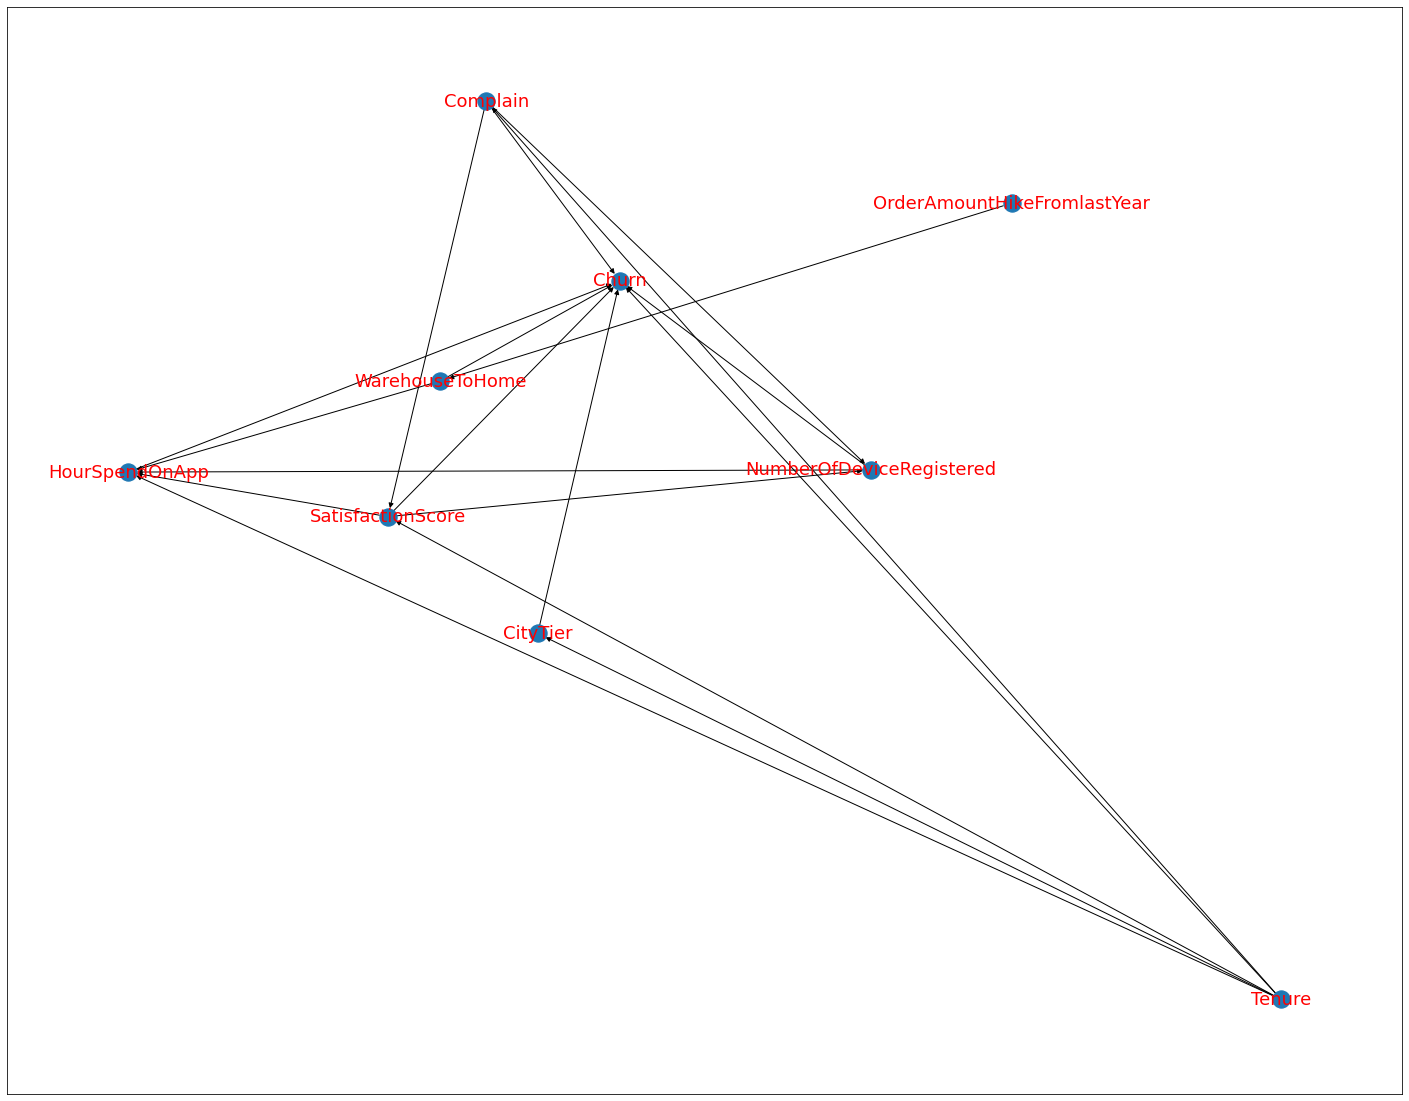

In [69]:
# Estimated Causal Graph

# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df)

# visualize network
fig=plt.figure(figsize=(25,20))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r')